# Dogs Vs Cats

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2620803967572219121
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14581498141943193804
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15476772270444286526
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7371987354
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17656314719194312212
physical_device_desc: "device: 0, name: GeForce GTX 1070 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [22]:
import glob
import cv2
X = []
y = []
folders = ['cats', 'dogs']
for label, folder in enumerate(folders):
    print (label, folder)
    for i, img in enumerate(glob.glob('/home/santosh/DL/dogsvscats/dataset/data/'+folder+'/*.jpg')):
        #print (i)
        image = cv2.resize(cv2.imread(img), (255, 255))
        X.append(image)
        y.append(label)

0 cats
1 dogs


In [23]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)
print (X.shape)
print (y.shape)

(10000, 255, 255, 3)
(10000,)


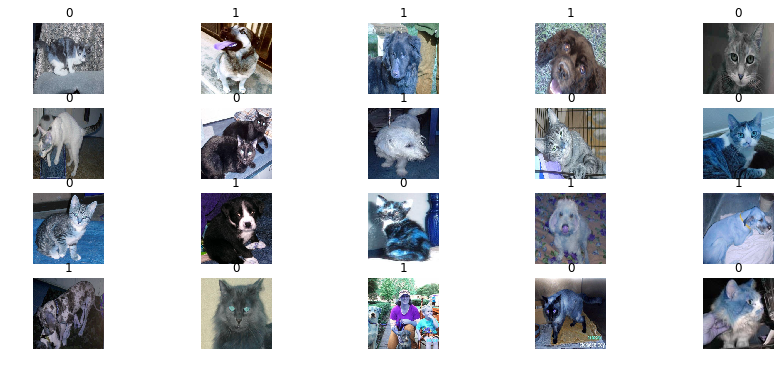

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X))
    image = X[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y[index])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [26]:
#Check
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (8000, 255, 255, 3)
y_train shape (8000,)
X_test shape (2000, 255, 255, 3)
y_test shape (2000,)


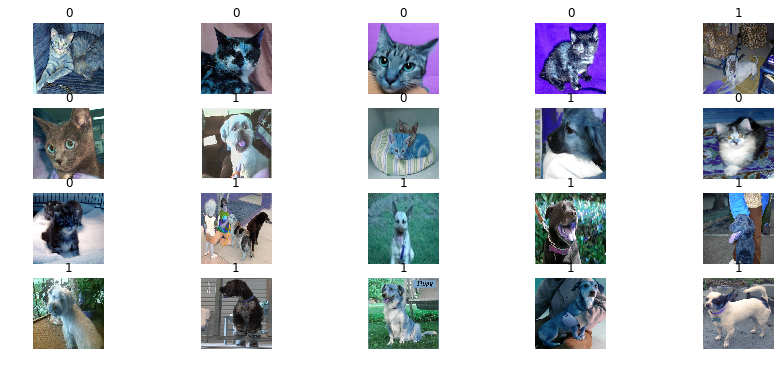

In [27]:
fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

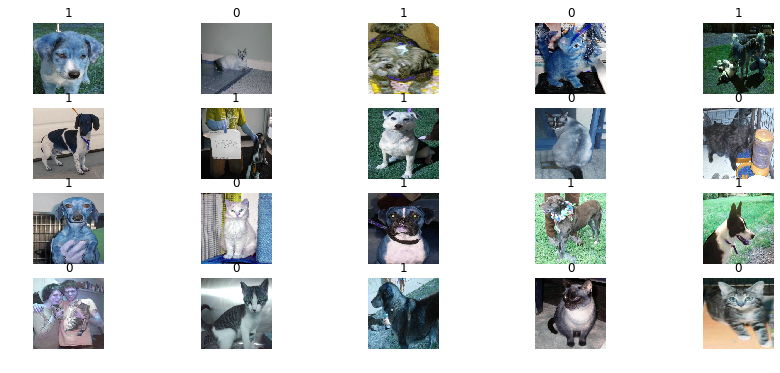

In [28]:
fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_test))
    image = X_test[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_test[index])

In [29]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of classes : ', nClasses)
print('Output classes : ', classes)

Total number of classes :  2
Output classes :  [0 1]


In [30]:
from keras.utils import to_categorical
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

In [31]:
print (X_train.shape)

(8000, 255, 255, 3)


In [32]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = X_train.shape[1:]
train_data = X_train.reshape(X_train.shape[0], nRows, nCols, nDims)
test_data = X_test.reshape(X_test.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)
print (input_shape)


# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

print (train_data.shape)
print (test_data.shape)

(255, 255, 3)
(8000, 255, 255, 3)
(2000, 255, 255, 3)


In [49]:
classifier = Sequential()#Initialize 

In [50]:
classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), input_shape=(255, 255, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=2, activation='softmax'))

In [51]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
#Image augmentation
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

# training_set = train_datagen.flow_from_directory('dataset/training_set',
#                                                  target_size=(64, 64),
#                                                  batch_size=32,
#                                                  class_mode='binary')

# test_set = test_datagen.flow_from_directory('dataset/test_set', 
#                                             target_size=(64, 64),
#                                             batch_size=32,
#                                             class_mode='binary')

batch_size = 64
epochs = 10
datagen = ImageDataGenerator(
        zoom_range=0.2, # randomly zoom into images
        shear_range=0.2,
        #rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


# datagen.fit(train_data)

# Fit the model on the batches generated by datagen.flow().
history1 = classifier.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

classifier.evaluate(test_data, test_labels_one_hot)

Epoch 1/10
125/125 [==============================] - 22s 180ms/step - loss: 8.0357 - acc: 0.4973 - val_loss: 7.9623 - val_acc: 0.5060
Epoch 2/10
125/125 [==============================] - 17s 140ms/step - loss: 8.0832 - acc: 0.4985 - val_loss: 7.9623 - val_acc: 0.5060
Epoch 3/10
125/125 [==============================] - 17s 139ms/step - loss: 8.0832 - acc: 0.4985 - val_loss: 7.9623 - val_acc: 0.5060
Epoch 4/10
125/125 [==============================] - 18s 141ms/step - loss: 8.0832 - acc: 0.4985 - val_loss: 7.9623 - val_acc: 0.5060
Epoch 5/10
125/125 [==============================] - 17s 140ms/step - loss: 8.0832 - acc: 0.4985 - val_loss: 7.9623 - val_acc: 0.5060
Epoch 6/10
125/125 [==============================] - 18s 141ms/step - loss: 8.0832 - acc: 0.4985 - val_loss: 7.9623 - val_acc: 0.5060
Epoch 7/10
125/125 [==============================] - 18s 142ms/step - loss: 8.0832 - acc: 0.4985 - val_loss: 7.9623 - val_acc: 0.5060
Epoch 8/10
125/125 [==============================] - 1

[7.962339263916015, 0.506]

In [53]:
#new model

In [70]:
from keras.layers import Dropout
classifier2 = Sequential()#Initialize 

In [71]:
classifier2.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), input_shape=(255, 255, 3), activation='relu'))
#classifier2.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
classifier2.add(Dropout(0.5))
classifier2.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
#classifier2.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
classifier2.add(Dropout(0.5))
classifier2.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
classifier2.add(MaxPooling2D(pool_size=(2,2)))
classifier2.add(Dropout(0.5))
classifier2.add(Flatten())
classifier2.add(Dense(units=128, activation='relu'))
classifier2.add(Dropout(0.5))
classifier2.add(Dense(units=64, activation='relu'))
classifier2.add(Dense(units=32, activation='relu'))
classifier2.add(Dense(units=1, activation='sigmoid'))

In [72]:
classifier2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
#Image augmentation
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

# training_set = train_datagen.flow_from_directory('dataset/training_set',
#                                                  target_size=(256, 256),
#                                                  batch_size=32,
#                                                  class_mode='binary')

# test_set = test_datagen.flow_from_directory('dataset/test_set', 
#                                             target_size=(256, 256),
#                                             batch_size=32,
#                                             class_mode='binary')
batch_size = 64
epochs = 100
datagen = ImageDataGenerator(
        zoom_range=0.2, # randomly zoom into images
        shear_range=0.2,
        #rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


# datagen.fit(train_data)

# Fit the model on the batches generated by datagen.flow().
history2 = classifier2.fit_generator(datagen.flow(train_data, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, y_test),
                              workers=4)

classifier2.evaluate(test_data, y_test)

Epoch 1/100
125/125 [==============================] - 20s 158ms/step - loss: 0.7004 - acc: 0.5165 - val_loss: 0.6880 - val_acc: 0.5540
Epoch 2/100
125/125 [==============================] - 17s 134ms/step - loss: 0.6742 - acc: 0.5662 - val_loss: 0.6609 - val_acc: 0.6005
Epoch 3/100
125/125 [==============================] - 17s 134ms/step - loss: 0.6578 - acc: 0.6069 - val_loss: 0.6651 - val_acc: 0.5940
Epoch 4/100
125/125 [==============================] - 17s 134ms/step - loss: 0.6438 - acc: 0.6271 - val_loss: 0.6304 - val_acc: 0.6345
Epoch 5/100
125/125 [==============================] - 17s 133ms/step - loss: 0.6385 - acc: 0.6296 - val_loss: 0.6634 - val_acc: 0.6400
Epoch 6/100
125/125 [==============================] - 17s 134ms/step - loss: 0.6201 - acc: 0.6505 - val_loss: 0.6344 - val_acc: 0.6305
Epoch 7/100
125/125 [==============================] - 17s 134ms/step - loss: 0.6140 - acc: 0.6607 - val_loss: 0.6214 - val_acc: 0.6590
Epoch 8/100
125/125 [===========================

Epoch 61/100
125/125 [==============================] - 17s 139ms/step - loss: 0.4799 - acc: 0.7681 - val_loss: 0.7227 - val_acc: 0.6445
Epoch 62/100
125/125 [==============================] - 17s 136ms/step - loss: 0.4805 - acc: 0.7699 - val_loss: 0.6660 - val_acc: 0.6510
Epoch 63/100
125/125 [==============================] - 17s 138ms/step - loss: 0.4712 - acc: 0.7768 - val_loss: 0.8040 - val_acc: 0.5635
Epoch 64/100
125/125 [==============================] - 17s 137ms/step - loss: 0.4690 - acc: 0.7735 - val_loss: 0.7499 - val_acc: 0.6125
Epoch 65/100
125/125 [==============================] - 17s 138ms/step - loss: 0.4689 - acc: 0.7780 - val_loss: 0.8037 - val_acc: 0.6060
Epoch 66/100
125/125 [==============================] - 17s 135ms/step - loss: 0.4693 - acc: 0.7735 - val_loss: 0.6762 - val_acc: 0.6335
Epoch 67/100
125/125 [==============================] - 17s 137ms/step - loss: 0.4745 - acc: 0.7774 - val_loss: 0.6705 - val_acc: 0.6585
Epoch 68/100
125/125 [===================

[0.6657764258384704, 0.6415]

NameError: name 'training_set' is not defined

In [74]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('dataset/single_prediction/random_cat.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier2.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
print (prediction)

ValueError: Error when checking input: expected conv2d_18_input to have shape (255, 255, 3) but got array with shape (256, 256, 3)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = classifier2.predict_generator(test_set)
print (Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print (y_pred)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

[[1.3415220e-10]
 [1.0000000e+00]
 [9.8752159e-01]
 ...
 [9.9032766e-01]
 [1.0977252e-20]
 [1.0000000e+00]]
[0 0 0 ... 0 0 0]
Confusion Matrix
[[1000    0]
 [1000    0]]


In [16]:
print(classification_report(training_set.classes, y_pred, target_names=['Dog', 'Cat']))

              precision    recall  f1-score   support

         Dog       0.50      1.00      0.67      4000
         Cat       0.00      0.00      0.00      4000

   micro avg       0.50      0.50      0.50      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.25      0.50      0.33      8000



/home/santosh/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
